In [2]:
import numpy as np
import pandas as pd
import statsmodels.regression.linear_model as lm
import statsmodels.tools.tools as ct

In [3]:
# Read the S&P 500 dataset 

returns = pd.read_csv('S&P ETF SPY.csv', index_col='Date', parse_dates=True)

In [ ]:
# CAPM Single Factor Model Linear Regression Calculation

#### Lets try something different


In [6]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Modelling CAPM and calculating alpha and beta from historical values.
import pandas_datareader as pdr
from pandas_datareader import data, wb
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



### Looking at the stock data individually

In [10]:
pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23448 sha256=6c08c3d64a0a81c7abd1c104a3ae2193bb99ca1c1b063736cdc91422305e8c7b
  Stored in directory: C:\Users\judah\AppData\Local\pip\Cache\wheels\f8\2a\0f\4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
  Created wheel for multitasking: filename=multitasking-0.0.9-cp37-none-any.whl size=8373 sha256=5641ad9e88db17d502ee950b202e51a3c53e2656b8ceaefc2c09ef2199522dba
  Stored in directory: C:\Users\judah\AppData\Local\pip\Cache\wheels\37\fa\73\d492849e319038eb4d986f5152e4b19ffb1bc0639da84d2677
Successfully built yfinance multitasking
  Found existing installation: lxml 4.4.1
    Uninstalling lxml-4.4.1:
      Successfully uninstalled lxml-4.4.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import talib
import yfinance as yf

In [3]:
# Looking at Tesla stock prices over the years
import yfinance as yf
df = yf.download("TSLA", start="2016-03-31", end="2021-03-31", interval="1d")
df.head()

[*********************100%***********************]  1 of 1 completed


Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2016-03-31  45.868000  47.484001  45.001999  45.953999  45.953999  40064500
2016-04-01  48.966000  49.580002  46.650002  47.518002  47.518002  79987500
2016-04-04  49.824001  50.424000  48.728001  49.397999  49.397999  67376500
2016-04-05  48.099998  51.312000  48.000000  51.094002  51.094002  49743500
2016-04-06  50.793999  53.548000  50.689999  53.084000  53.084000  58527500

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

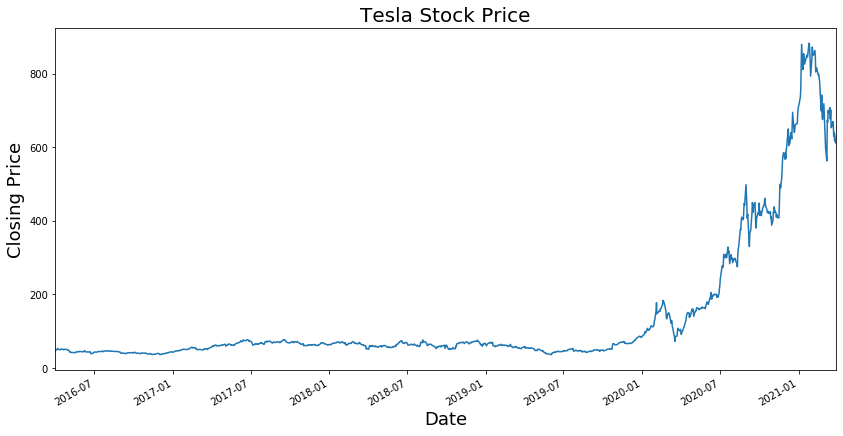

In [11]:
fig = df[df.index >= "2016-03-31"].Close.plot(figsize=(14, 7))
plt.title ('Tesla Stock Price', fontsize = 20)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price', fontsize = 18)
#fig.savefig('Tesla_st.jpg')

###### 
Upon analysis of the stock price using the moving average, to identify the direction of a  price trend, without the interference of shorter-term price spikes.

The MA indicator combines price points of a stock over a specified time frame and divides it by the number of data points to present a single trend line.

Let’s calculate 20 days (short term) and 200 days (long term) MA on TSLA Closing prices (we can calculate MA directly with pandas):

Traders watch for crossovers of longer-term moving averages by shorter-term moving averages as possible indicators of trend changes to enter long and short positions.

According to Stan Weinstein: The price must be above the short term MA in order to buy a stock.

Text(0, 0.5, 'Closing Price')

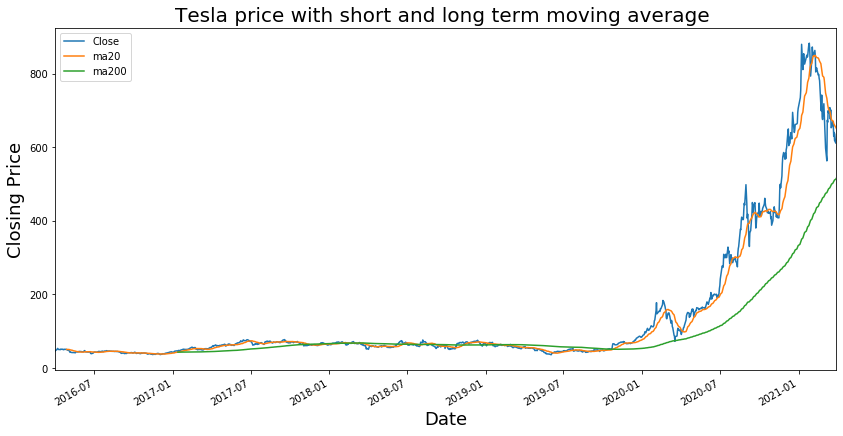

In [14]:
df.loc[:, 'ma20'] = df.Close.rolling(20).mean()
df.loc[:, 'ma200'] = df.Close.rolling(200).mean()
df[["Close", "ma20", "ma200"]].plot(figsize=(14, 7))
plt.title ('Tesla price with short and long term moving average ', fontsize = 20)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price', fontsize = 18)

#### 
Now lets consider the relative strength index (RSI) of Tesla. The relative strength tells about the value of a stock in comparison to another stock, index or benchmark, while the RSI tells about the performance of a stock in comparison to the recent performance of the same stock.

Let’s calculate the RSI for Tesla

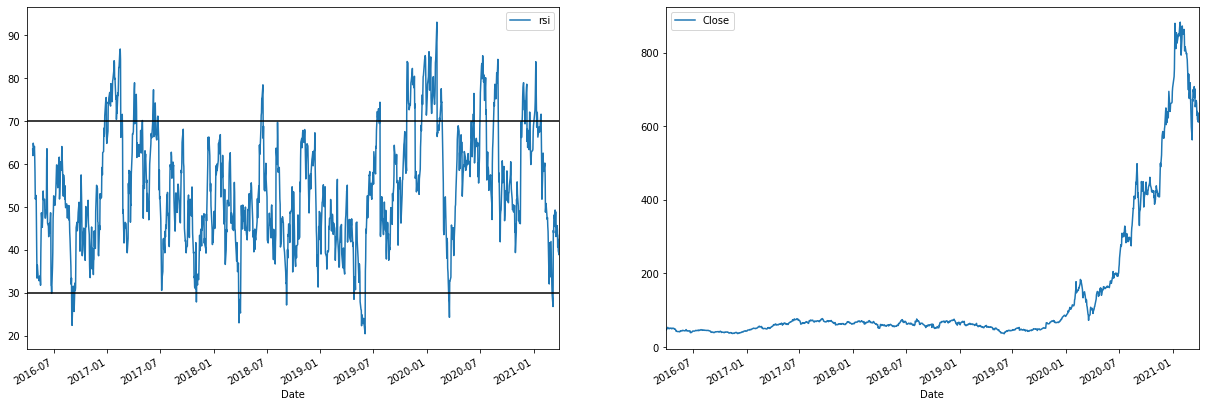

In [21]:
df.loc[:, "rsi"] = talib.RSI(df.Close, 14)

# Making the necessary plots for the RSI
# The line at 30 indicates oversold and 70 for overbought

fig, ax = plt.subplots(1, 2, figsize=(21, 7))

ax0 = df[["rsi"]].plot(ax=ax[0])
ax0.axhline(30, color="black")
ax0.axhline(70, color="black")

df[["Close"]].plot(ax=ax[1])



An asset with RSI ≥70 is often considered overbought, while an asset with RSI ≤ 30 is often considered oversold/ underbought which is preferred on the part of the buyer.

An overbought signal suggests that assets may be in for a price correction.
An oversold signal could mean that short-term declines are reaching maturity and assets may be in for a rally.

From the plots above it is seen that when there's an initial price surge, buying at that spike signifies overbuying. The Tesla price moves as the RSI suggests. When overbought (RSI >= 70), the price is in for correction and vice versa.

In [23]:
pip install plotly


^C
Note: you may need to restart the kernel to use updated packages.


In [24]:
jupyter labextension install jupyterlab-plotly

SyntaxError: invalid syntax (<ipython-input-24-923fc71b0f42>, line 1)

In [26]:
import plotly.graph_objects as go
fig = go.Figure(
    data=go.Ohlc(
        x=df.index,
        open=df["Open"],
        high=df["High"],
        low=df["Low"],
        close=df["Close"],
    )
)
fig.show()

### Analysis of GameStop Data

[*********************100%***********************]  1 of 1 completed


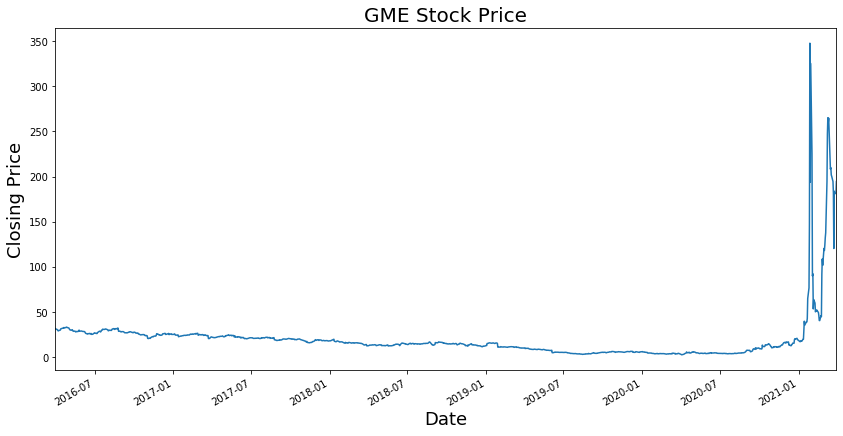

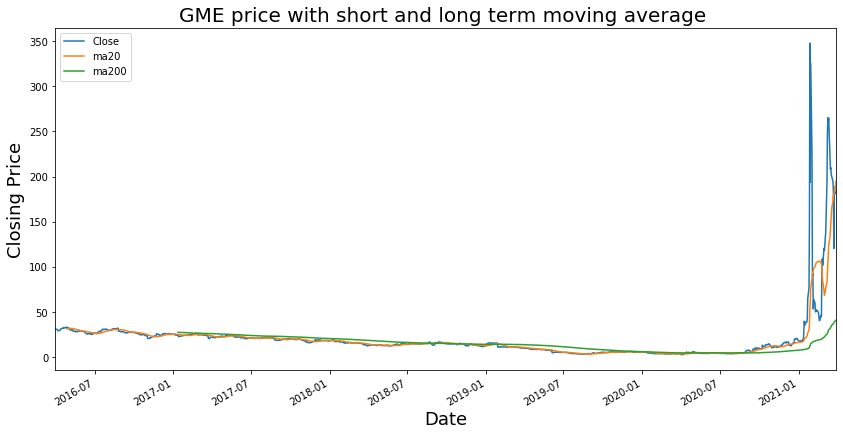

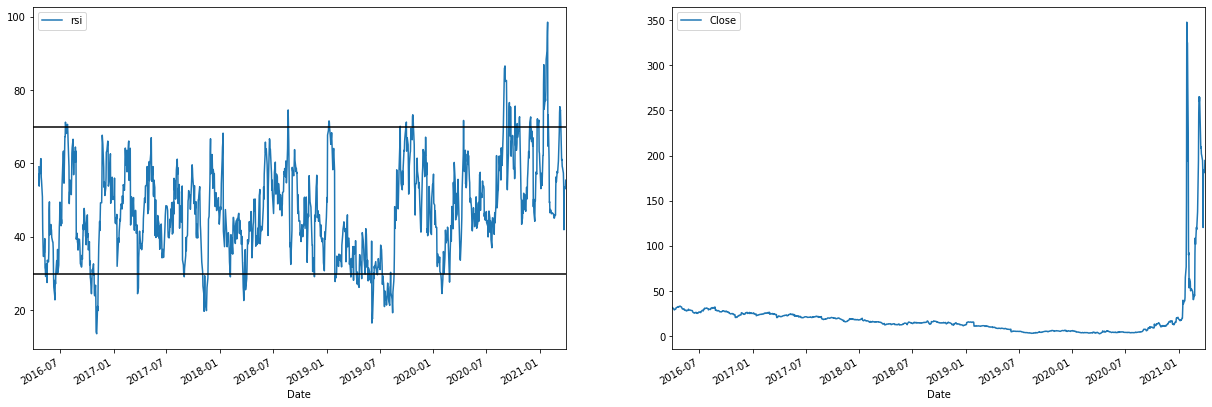

In [27]:
df = yf.download("GME", start="2016-03-31", end="2021-03-31", interval="1d")
df.head()

# Stock Price Plot
fig = df[df.index >= "2016-03-31"].Close.plot(figsize=(14, 7))
plt.title ('GME Stock Price', fontsize = 20)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price', fontsize = 18)

# Moving Averages
df.loc[:, 'ma20'] = df.Close.rolling(20).mean()
df.loc[:, 'ma200'] = df.Close.rolling(200).mean()
df[["Close", "ma20", "ma200"]].plot(figsize=(14, 7))
plt.title ('GME price with short and long term moving average ', fontsize = 20)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price', fontsize = 18)

# RSI
df.loc[:, "rsi"] = talib.RSI(df.Close, 14)
# The line at 30 indicates oversold and 70 for overbought
fig, ax = plt.subplots(1, 2, figsize=(21, 7))

ax0 = df[["rsi"]].plot(ax=ax[0])
ax0.axhline(30, color="black")
ax0.axhline(70, color="black")

df[["Close"]].plot(ax=ax[1])



## Now removing the data of where there was an increased stock price to see if there's an effect on the moving average and RSI

[*********************100%***********************]  1 of 1 completed


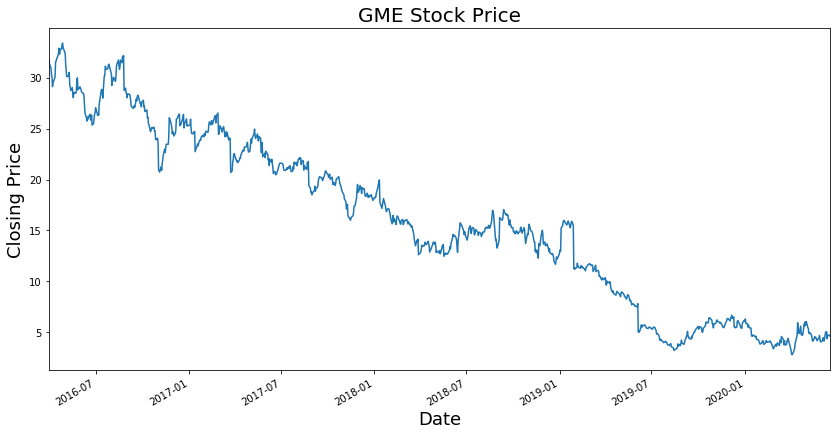

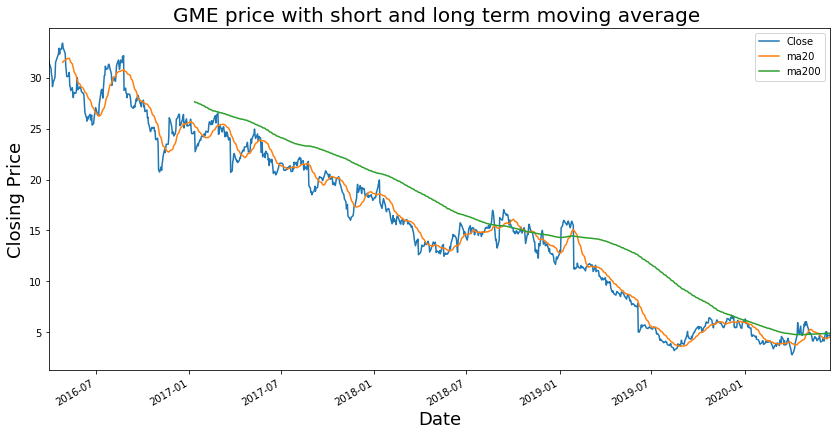

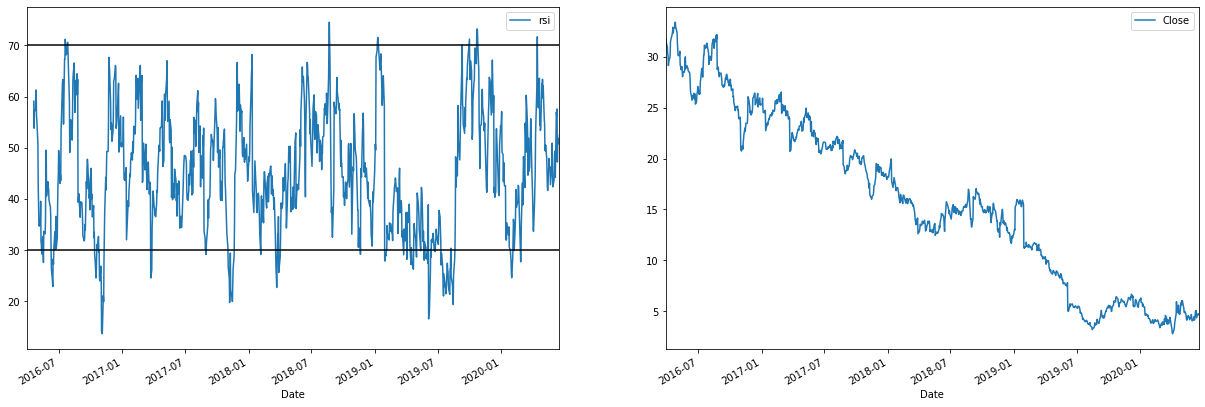

In [30]:
# Stock Price Plot
# From analysis of the stock price, it is seen that around june 18, 2020, the srock price goes
# before surprisingly rallying up.

df = yf.download("GME", start="2016-03-31", end="2020-06-18", interval="1d")
df.head()

fig = df[df.index <="2020-06-18"].Close.plot(figsize=(14, 7))
plt.title ('GME Stock Price', fontsize = 20)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price', fontsize = 18)

# Moving Averages
df.loc[:, 'ma20'] = df.Close.rolling(20).mean()
df.loc[:, 'ma200'] = df.Close.rolling(200).mean()
df[["Close", "ma20", "ma200"]].plot(figsize=(14, 7))
plt.title ('GME price with short and long term moving average ', fontsize = 20)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price', fontsize = 18)

# RSI
df.loc[:, "rsi"] = talib.RSI(df.Close, 14)
# The line at 30 indicates oversold and 70 for overbought
fig, ax = plt.subplots(1, 2, figsize=(21, 7))

ax0 = df[["rsi"]].plot(ax=ax[0])
ax0.axhline(30, color="black")
ax0.axhline(70, color="black")

df[["Close"]].plot(ax=ax[1])



### From the plots above, even if the surge in stock price appeared in a short time interval than compared to the 5 yr period of stock analysis, this affects the interpretation of the moving average. 

### Analysis of AMC Stock Prices including price surge

[*********************100%***********************]  1 of 1 completed


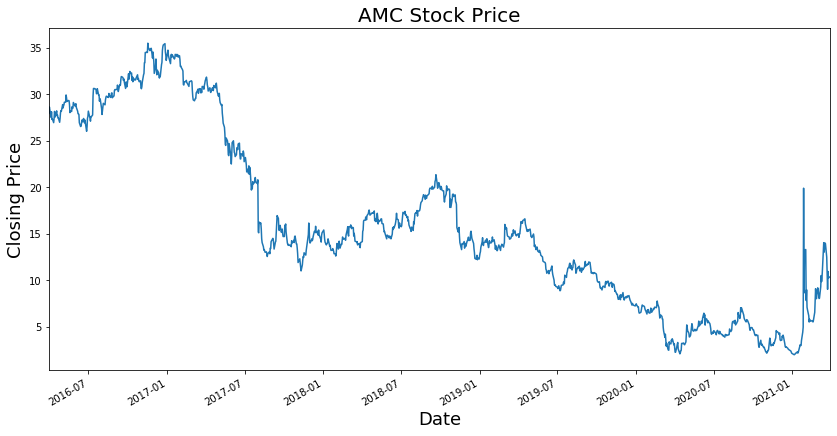

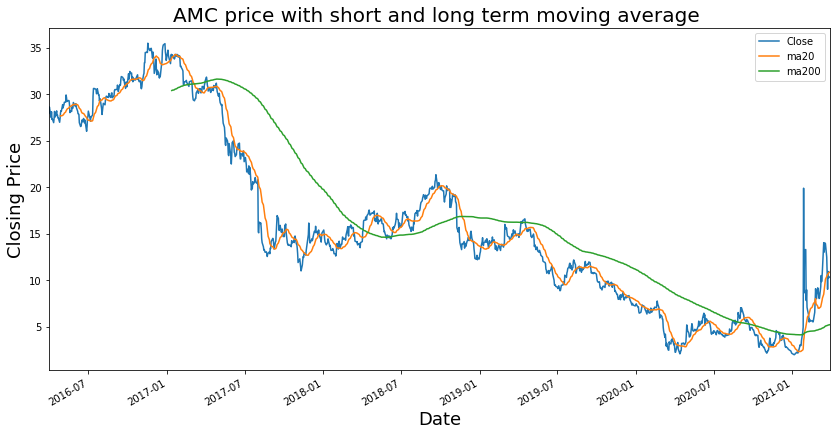

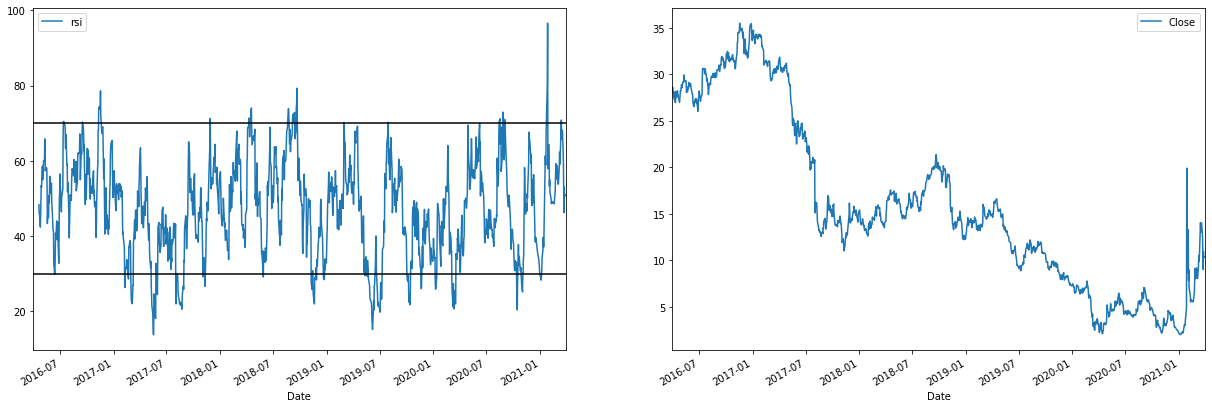

In [32]:
df = yf.download("AMC", start="2016-03-31", end="2021-03-31", interval="1d")
df.head()

fig = df[df.index >="2016-03-31"].Close.plot(figsize=(14, 7))
plt.title ('AMC Stock Price', fontsize = 20)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price', fontsize = 18)

# Moving Averages
df.loc[:, 'ma20'] = df.Close.rolling(20).mean()
df.loc[:, 'ma200'] = df.Close.rolling(200).mean()
df[["Close", "ma20", "ma200"]].plot(figsize=(14, 7))
plt.title ('AMC price with short and long term moving average ', fontsize = 20)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price', fontsize = 18)

# RSI
df.loc[:, "rsi"] = talib.RSI(df.Close, 14)
# The line at 30 indicates oversold and 70 for overbought
fig, ax = plt.subplots(1, 2, figsize=(21, 7))

ax0 = df[["rsi"]].plot(ax=ax[0])
ax0.axhline(30, color="black")
ax0.axhline(70, color="black")

df[["Close"]].plot(ax=ax[1])



### Analysis of AMC Stock Prices prior to price surge

[*********************100%***********************]  1 of 1 completed


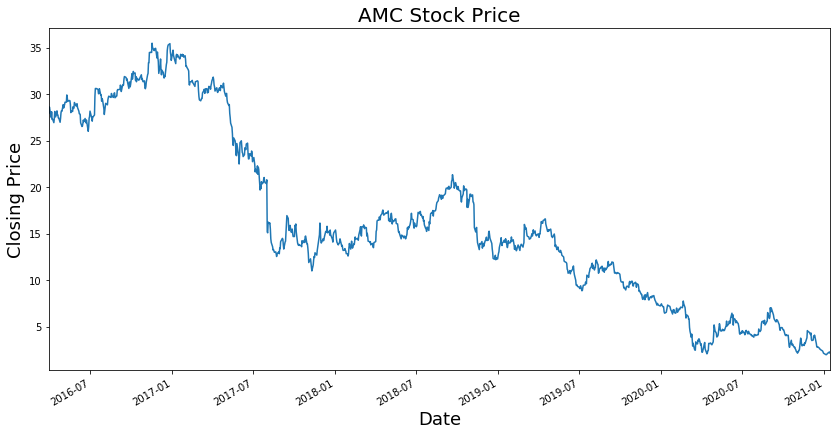

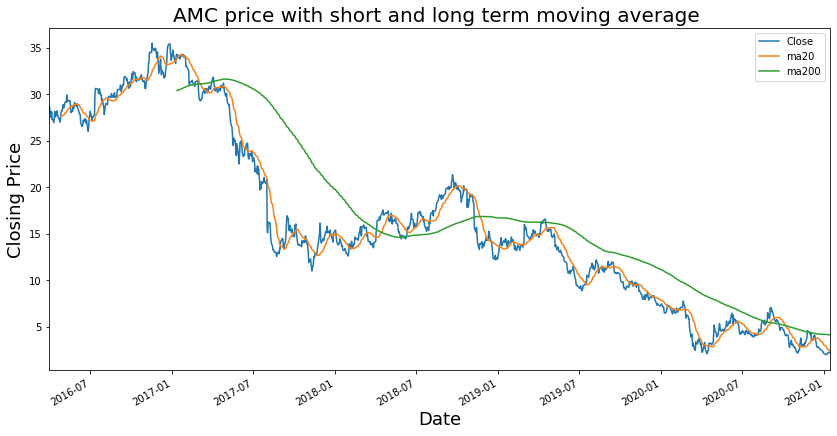

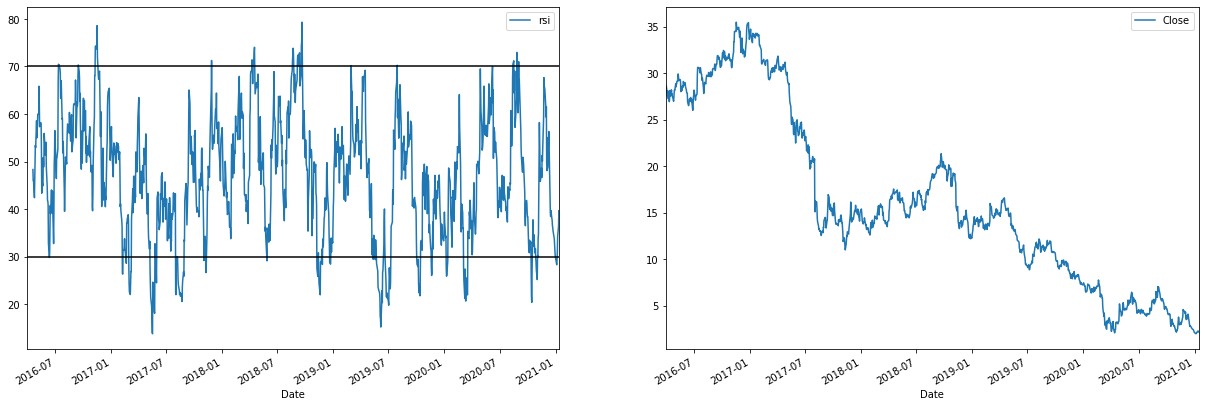

In [33]:
# Stock Price Plot
# From analysis of the stock price, it is seen that around Jan 15, 2021 the stock price goes
# down before surprisingly rallying up.

df = yf.download("AMC", start="2016-03-31", end="2021-01-15", interval="1d")
df.head()

fig = df[df.index <="2021-01-15"].Close.plot(figsize=(14, 7))
plt.title ('AMC Stock Price', fontsize = 20)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price', fontsize = 18)

# Moving Averages
df.loc[:, 'ma20'] = df.Close.rolling(20).mean()
df.loc[:, 'ma200'] = df.Close.rolling(200).mean()
df[["Close", "ma20", "ma200"]].plot(figsize=(14, 7))
plt.title ('AMC price with short and long term moving average ', fontsize = 20)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price', fontsize = 18)

# RSI
df.loc[:, "rsi"] = talib.RSI(df.Close, 14)
# The line at 30 indicates oversold and 70 for overbought
fig, ax = plt.subplots(1, 2, figsize=(21, 7))

ax0 = df[["rsi"]].plot(ax=ax[0])
ax0.axhline(30, color="black")
ax0.axhline(70, color="black")

df[["Close"]].plot(ax=ax[1])


### Analysis of Nokia Stock Prices including price surge

[*********************100%***********************]  1 of 1 completed


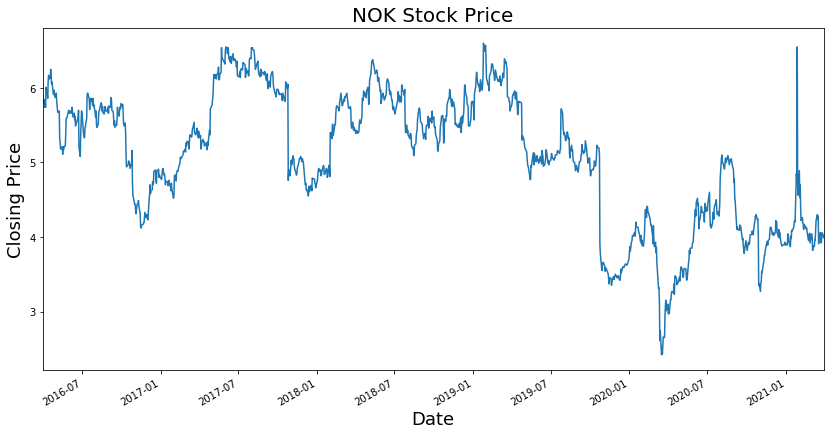

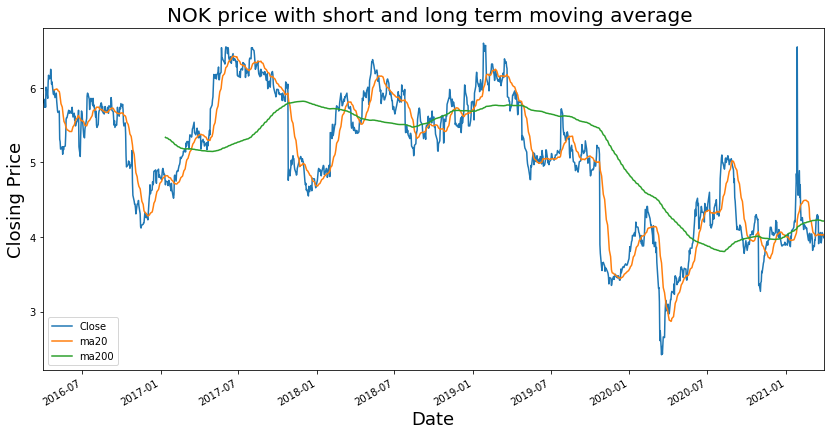

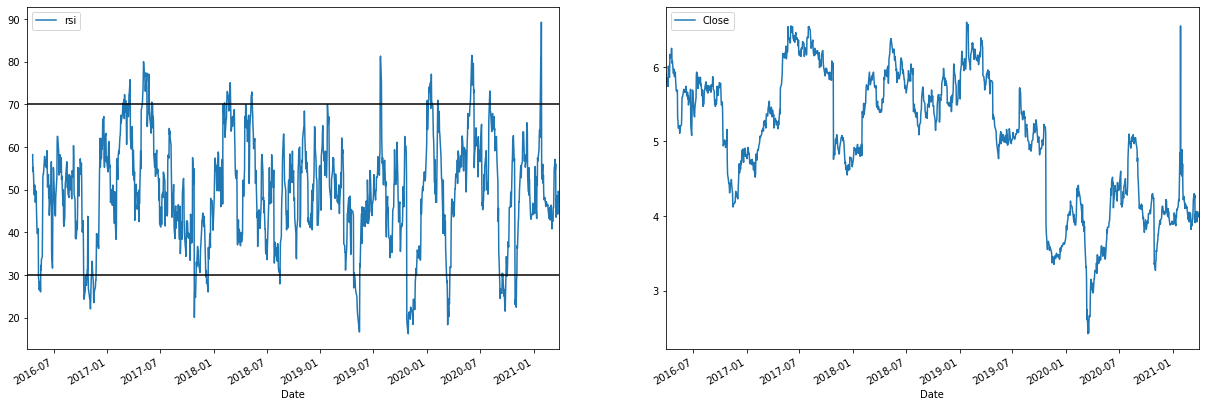

In [34]:
df = yf.download("NOK", start="2016-03-31", end="2021-03-31", interval="1d")
df.head()

fig = df[df.index >="2016-03-31"].Close.plot(figsize=(14, 7))
plt.title ('NOK Stock Price', fontsize = 20)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price', fontsize = 18)

# Moving Averages
df.loc[:, 'ma20'] = df.Close.rolling(20).mean()
df.loc[:, 'ma200'] = df.Close.rolling(200).mean()
df[["Close", "ma20", "ma200"]].plot(figsize=(14, 7))
plt.title ('NOK price with short and long term moving average ', fontsize = 20)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price', fontsize = 18)

# RSI
df.loc[:, "rsi"] = talib.RSI(df.Close, 14)
# The line at 30 indicates oversold and 70 for overbought
fig, ax = plt.subplots(1, 2, figsize=(21, 7))

ax0 = df[["rsi"]].plot(ax=ax[0])
ax0.axhline(30, color="black")
ax0.axhline(70, color="black")

df[["Close"]].plot(ax=ax[1])



### Analysis of NOK Stock Prices prior to price surge

[*********************100%***********************]  1 of 1 completed


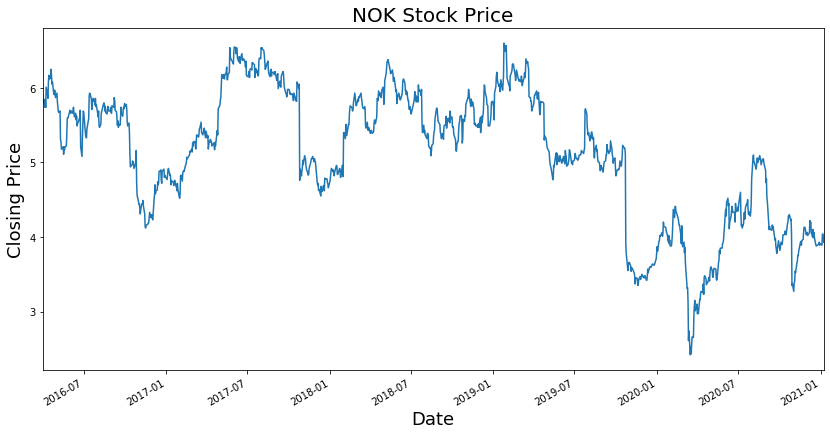

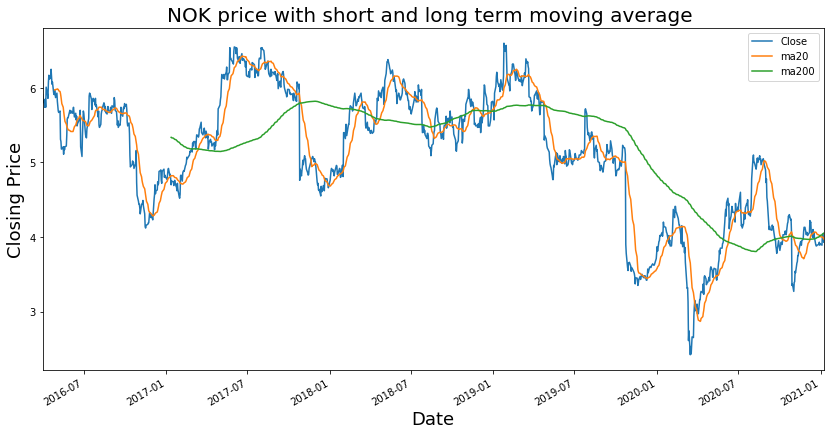

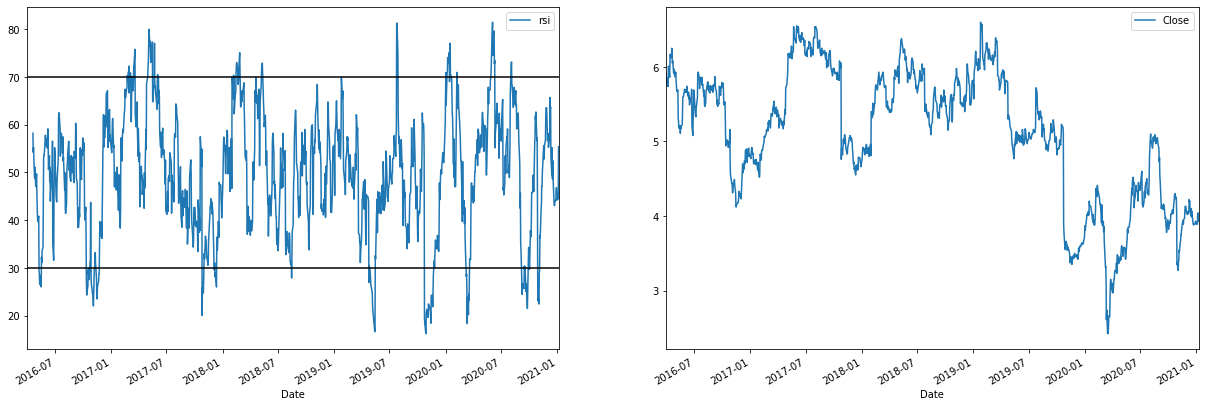

In [35]:
# Stock Price Plot
# From analysis of the stock price, it is seen that around Jan 11, 2021 the stock price goes
# down before surprisingly rallying up.

df = yf.download("NOK", start="2016-03-31", end="2021-01-11", interval="1d")
df.head()

fig = df[df.index <="2021-01-11"].Close.plot(figsize=(14, 7))
plt.title ('NOK Stock Price', fontsize = 20)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price', fontsize = 18)

# Moving Averages
df.loc[:, 'ma20'] = df.Close.rolling(20).mean()
df.loc[:, 'ma200'] = df.Close.rolling(200).mean()
df[["Close", "ma20", "ma200"]].plot(figsize=(14, 7))
plt.title ('NOK price with short and long term moving average ', fontsize = 20)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price', fontsize = 18)

# RSI
df.loc[:, "rsi"] = talib.RSI(df.Close, 14)
# The line at 30 indicates oversold and 70 for overbought
fig, ax = plt.subplots(1, 2, figsize=(21, 7))

ax0 = df[["rsi"]].plot(ax=ax[0])
ax0.axhline(30, color="black")
ax0.axhline(70, color="black")

df[["Close"]].plot(ax=ax[1])


#### Analysis of Ethereum Price

[*********************100%***********************]  1 of 1 completed


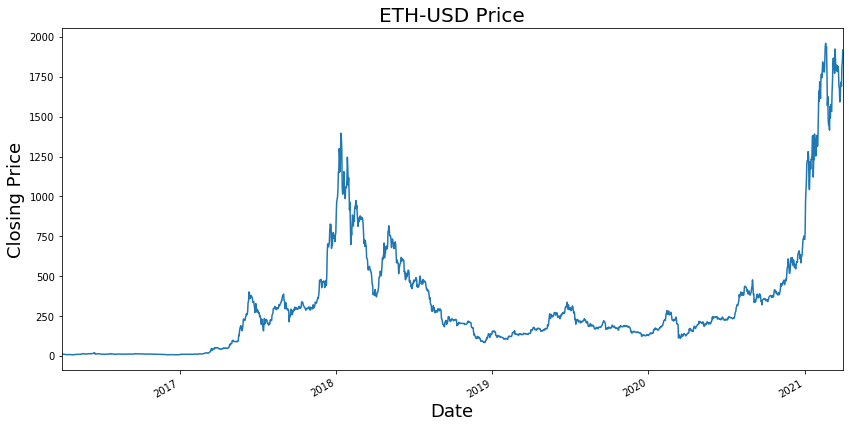

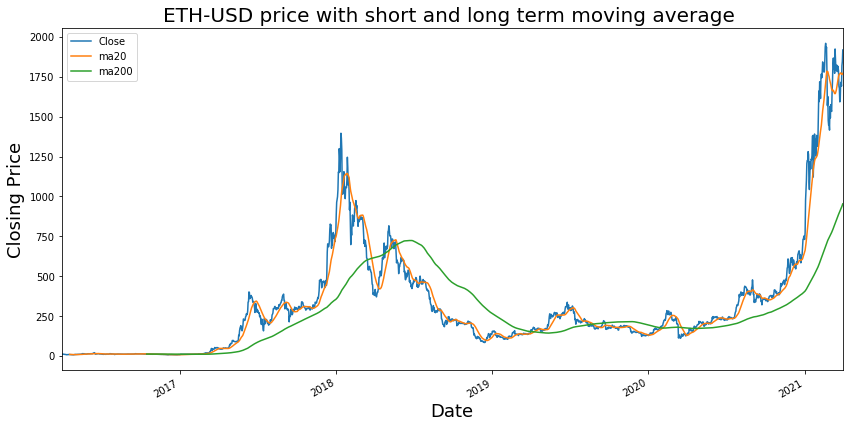

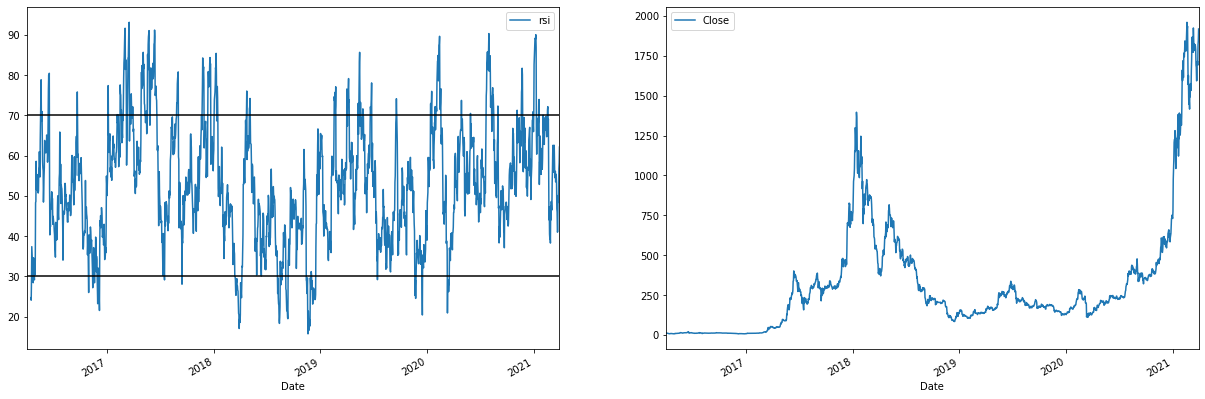

In [36]:
df = yf.download("ETH-USD", start="2016-03-31", end="2021-03-31", interval="1d")
df.head()

fig = df[df.index >="2016-03-31"].Close.plot(figsize=(14, 7))
plt.title ('ETH-USD Price', fontsize = 20)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price', fontsize = 18)

# Moving Averages
df.loc[:, 'ma20'] = df.Close.rolling(20).mean()
df.loc[:, 'ma200'] = df.Close.rolling(200).mean()
df[["Close", "ma20", "ma200"]].plot(figsize=(14, 7))
plt.title ('ETH-USD price with short and long term moving average ', fontsize = 20)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price', fontsize = 18)

# RSI
df.loc[:, "rsi"] = talib.RSI(df.Close, 14)
# The line at 30 indicates oversold and 70 for overbought
fig, ax = plt.subplots(1, 2, figsize=(21, 7))

ax0 = df[["rsi"]].plot(ax=ax[0])
ax0.axhline(30, color="black")
ax0.axhline(70, color="black")

df[["Close"]].plot(ax=ax[1])



### Portfolio Optimization

In [37]:
# Modelling CAPM and calculating alpha and beta from historical values.
import pandas_datareader as pdr
from pandas_datareader import data, wb
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
# Fetch data for Apple stock prices and for S&P-500 Index from Yahoo Finance:

def capm(start_date, end_date, ticker1, ticker2):
    df = pdr.get_data_yahoo(ticker1, start_date, end_date)
    dfb = pdr.get_data_yahoo(ticker2, start_date, end_date)

# create a time-series
    rts = df.resample('M').last()
    rbts = dfb.resample('M').last()
    dfsm = pd.DataFrame({'s_adjclose' : rts['Adj Close'], 'b_adjclose' : rbts['Adj Close']}, index=rts.index)

# compute returns
    dfsm[['s_returns', 'b_returns']] = dfsm[['s_adjclose','b_adjclose']]/dfsm[['s_adjclose','b_adjclose']].shift(1) -1
    dfsm = dfsm.dropna()

    covmat = np.cov(dfsm["s_returns"], dfsm["b_returns"])

# calculate measures now
    beta = covmat[0,1]/covmat[1,1]
    alpha = np.mean(dfsm["s_returns"])-beta*np.mean(dfsm["b_returns"])

# r_squared     = 1.0 - SS_res/SS_tot
    y = beta * dfsm["b_returns"] + alpha
    SS_res = np.sum(np.power(y - dfsm["s_returns"],2))
    SS_tot = covmat[0,0]*(len(dfsm) - 1) # SS_tot is sample_variance*(n-1)

    r_squared = 1.0 - SS_res/SS_tot
# Volatility for the full time and 1-year momentum
    volatility = np.sqrt(covmat[0,0])
    momentum = np.prod(1+dfsm["s_returns"].tail(12).values) - 1.0

# annualize the numbers
    prd = 12.0 # used monthly returns; 12 periods to annualize
    alpha = alpha*prd
    volatility = volatility*np.sqrt(prd)

    print ("Beta, alpha, r_squared, volatility, momentum:")
    print (beta, alpha, r_squared, volatility, momentum)

    %pylab
    fig,ax = plt.subplots(1,figsize=(20,10))
    ax.scatter(dfsm["b_returns"], dfsm['s_returns'], label="Data points")
    beta,alpha = np.polyfit(dfsm["b_returns"], dfsm['s_returns'], deg=1)
    ax.plot(dfsm["b_returns"], beta*dfsm["b_returns"] + alpha, color='red', label="CAPM line")


    plt.title('Capital Asset Pricing Model, finding alphas and betas')
    plt.xlabel('Market return $R_m$', fontsize=20)
    plt.ylabel('Stock return $R_i$')
    plt.text(0.05, 0.05, r'$R_i = \beta * R_m + \alpha$', fontsize=20)
    plt.legend()
    plt.grid(True)
    plt.show()


In [42]:
capm('2016-03-31', '2021-03-31','TSLA', '^GSPC')


Beta, alpha, r_squared, volatility, momentum:
2.0097429159184914 0.4444922809629753 0.20262263562619665 0.6642623313786052 5.373377607116186
Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [43]:
capm('2016-03-31', '2021-03-31','SPY', '^GSPC')

Beta, alpha, r_squared, volatility, momentum:
0.9941291168625286 0.01982576830521037 0.9993798381294521 0.14795191853491643 0.5623114205940816
Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [44]:
capm('2016-03-31', '2021-03-31','ETH-USD', '^GSPC')

Beta, alpha, r_squared, volatility, momentum:
1.5555623012532729 1.797114989386516 0.018675480016447144 1.6935367365550125 13.5779731365226
Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [45]:
capm('2016-03-31', '2021-03-31','GME', '^GSPC')

Beta, alpha, r_squared, volatility, momentum:
-1.847682555664826 3.6968732515049014 0.0014141001343215276 7.310218798351778 53.234287806919625
Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [46]:
# GME*
# Looking at comparing GME CAPM model without some data
capm('2016-03-31', '2021-01-8','GME', '^GSPC')

Beta, alpha, r_squared, volatility, momentum:
1.462121343755369 -0.06548500701238906 0.09763867033242946 0.7029628784291513 3.6067710753801956
Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [47]:
capm('2016-03-31', '2021-03-31','AMC', '^GSPC')

Beta, alpha, r_squared, volatility, momentum:
1.4031614075129009 0.654690697120247 0.007066002092455892 2.4834981996689356 2.23101258254017
Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [48]:
# AMC*
# Looking at comparing AMC CAPM model without some data
capm('2016-03-31', '2021-01-15','AMC', '^GSPC')

Beta, alpha, r_squared, volatility, momentum:
2.5166305973269 -0.5009380928579421 0.24381201463667201 0.7657711551614529 -0.6404456581749438
Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [49]:
capm('2016-03-31', '2021-03-31','NOK', '^GSPC')

Beta, alpha, r_squared, volatility, momentum:
0.7331247978811043 -0.09430815324992914 0.09910167315888652 0.3464818704985114 0.2774194064423161
Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [50]:
# NOK*
# Looking at comparing NOK CAPM model without some data
capm('2016-03-31', '2021-01-11','NOK', '^GSPC')

Beta, alpha, r_squared, volatility, momentum:
0.7960418863583986 -0.10891316317704738 0.12506627913729607 0.33809264442502446 -0.0025773785017729756
Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


### Modern Portfolio Theory / Mean Variance Analysis

In [2]:
#Importing all required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as web
from matplotlib.ticker import FuncFormatter

In [3]:
import pandas_datareader as dr
from datetime import datetime

# Define start and end date
end = datetime(2020, 7, 9)
start = datetime(2015, 8, 6)

# Create a list of the ticker symbols to be used in this project
tickers = ['AMZN', 'GOOGL', 'JNJ', 'V', 'PG', 'UNH', 'JPM', 'HD', 'VZ', 'NFLX', 'DIS', 'MRK', 'PEP', 'BAC', 'KO', 
           'WMT','CVX', 'ABT', 'AMGN', 'MCD', 'COST', 'NKE', 'PM', 'QCOM', 'LOW', 'BA', 'LMT', 'SBUX', 'UPS', 'CAT']

# Obtain the adjusted closing prices from Yahoo Finance
prices = pd.DataFrame()
for tick in tickers:
    prices[tick] = data.DataReader(tick, data_source='yahoo', start=start, end=end)['Adj Close']
prices.columns = tickers

NameError: name 'data' is not defined

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader as dr
from pandas_datareader import data
from datetime import datetime
import cvxopt as opt
from cvxopt import blas, solvers

In [2]:
# Define start and end date
end = datetime(2021, 1, 8) #yy-mm-dd
start = datetime(2016, 3, 31) #yy-mm-dd

In [3]:
# Create a list of the ticker symbols to be used in this project
tickers = ['TSLA','GME','AMC','NOK']

In [4]:
# Obtain the adjusted closing prices from Yahoo Finance
prices = pd.DataFrame()
for tick in tickers:
    prices[tick] = data.DataReader(tick, data_source='yahoo', start=start, end=end)['Adj Close']
prices.columns = tickers
    
prices

TSLA        GME        AMC       NOK
Date                                                  
2016-03-31   45.953999  24.768423  21.396677  5.116850
2016-04-01   47.518002  24.463989  21.893562  5.021613
2016-04-04   49.397999  24.143944  21.274366  5.047586
2016-04-05   51.094002  23.644358  21.037388  4.969665
2016-04-06   53.084000  23.488241  21.496054  5.064902
...                ...        ...        ...       ...
2021-01-04  729.770020  17.250000   2.010000  3.890000
2021-01-05  735.109985  17.370001   1.980000  4.040000
2021-01-06  755.979980  18.360001   2.010000  4.040000
2021-01-07  816.039978  18.080000   2.050000  3.990000
2021-01-08  880.020020  17.690001   2.140000  3.930000

[1204 rows x 4 columns]

In [5]:
normalised = prices / prices.iloc[0] * 100
normalised

## remember to make plot of dataframe here 

#type(normalised)
#normalised.plot(figsize=(20, 10))
#plt.title('Stock Time Series 2015 - 2020', fontsize=20)

TSLA         GME         AMC         NOK
Date                                                       
2016-03-31   100.000000  100.000000  100.000000  100.000000
2016-04-01   103.403410   98.770879  102.322255   98.138752
2016-04-04   107.494452   97.478728   99.428366   98.646356
2016-04-05   111.185105   95.461700   98.320818   97.123526
2016-04-06   115.515518   94.831395  100.464449   98.984765
...                 ...         ...         ...         ...
2021-01-04  1588.044658   69.645128    9.393982   76.023338
2021-01-05  1599.664900   70.129619    9.253773   78.954827
2021-01-06  1645.079871   74.126643    9.393982   78.954827
2021-01-07  1775.775783   72.996169    9.580927   77.977664
2021-01-08  1915.002061   71.421586   10.001554   76.805068

[1204 rows x 4 columns]

In [6]:
# Mean-Variance Portfolio Allocation

# Calculate the log returns
log_r = np.log(prices / prices.shift(1))

In [7]:

# Compute the annualised returns
annual_r = log_r.mean() * 252
annual_r

TSLA    0.618438
GME    -0.070503
AMC    -0.482304
NOK    -0.055281
dtype: float64

In [8]:
cov_matrix = log_r.cov() * 252


var = log_r.var() * 252

In [9]:

# Get the total number of stocks used
num_stocks = len(tickers)

# Generate 4 random weights between 0 and 1
weights = np.random.random(num_stocks)

# Constrain these weights to add up to 1
weights /= np.sum(weights)

weights

array([0.03964258, 0.4843463 , 0.07342713, 0.40258398])

In [10]:
# Example of what the portfolio return would look like given the above weights
ptf_r = np.sum(annual_r * weights)
ptf_r

-0.06730097878404567

In [11]:
# Compute portfolio variance
ptf_var = np.dot(weights.T, np.dot(cov_matrix, weights))
ptf_var

0.17023698004807158

In [12]:
# Calculate the standard deviation
ptf_std = np.sqrt(ptf_var)
ptf_std

0.4125978429997806

In [13]:
# Define a function to generate N number of random portfolios given a DataFrame of log returns
def generate_ptfs(returns, N):
    ptf_rs = []
    ptf_stds = []
    for i in range(N):
        weights = np.random.random(len(returns.columns))
        weights /= np.sum(weights)
        ptf_rs.append(np.sum(returns.mean() * weights) * 252)
        ptf_stds.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights))))
    ptf_rs = np.array(ptf_rs)
    ptf_stds = np.array(ptf_stds)
    return ptf_rs, ptf_stds

In [14]:
# Generate the return and volatility of 1000 random portfolios
ptf_rs, ptf_stds = generate_ptfs(log_r, 1000)

Text(0.5, 1.0, '1000 Randomly Generated Portfolios In The Risk-Return Space')

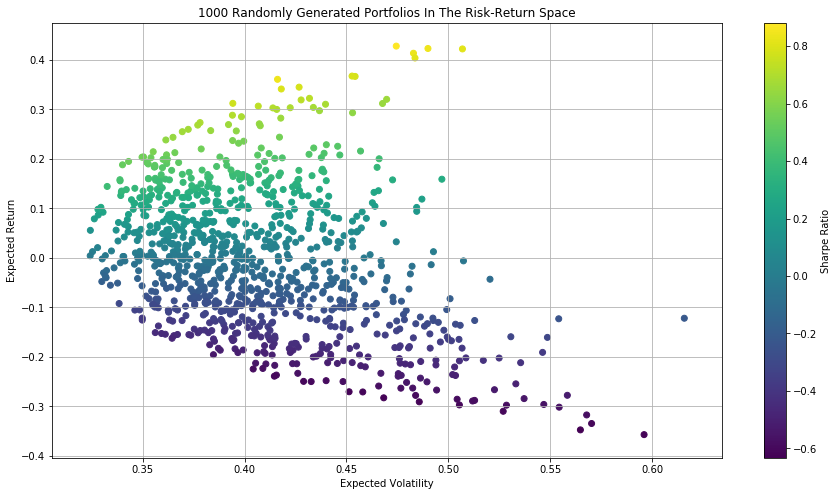

In [15]:
# Plot the 1000 randomly generated portfolio returns and volatilities and colormark the respective Sharpe ratios

plt.figure(figsize=(15, 8))
plt.scatter(ptf_stds, ptf_rs, c=(ptf_rs - 0.01)/ptf_stds, marker='o')
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.title('1000 Randomly Generated Portfolios In The Risk-Return Space')

##
finding the optimal portfolios requires a constrained optimisation in which we maximise the Sharpe ratio. To begin, we need a function that returns the portfolio statistics that we computed previously, namely weights, portflio return, portfolio volatility and, based on the latter two, the portfolio Sharpe ratio.

In [16]:
# Define a function that returns the portfolio statistics
def ptf_stats(weights):
    weights = np.array(weights)
    ptf_r = np.sum(log_r.mean() * weights) * 252
    ptf_std = np.sqrt(np.dot(weights.T, np.dot(log_r.cov() * 252, weights)))
    return np.array([ptf_r, ptf_std, (ptf_r - 0.01) / ptf_std])

In [17]:
# Import the optimise sublibrary
import scipy.optimize as sco

In [18]:
# Minimise the negative value of the Sharpe ratio
def min_sharpe(weights):
    return -ptf_stats(weights)[2]

In [19]:
# Write the constraint that the weights have to add up to 1
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bound the weights (parameter inputs) to be within 0 and 1
bnds = tuple((0, 1) for x in range(num_stocks))

In [20]:
# Starting parameter (weights) list as equal distribution
starting_ws = num_stocks * [1. / num_stocks,]

In [21]:
# Call the minimisation function
opts = sco.minimize(min_sharpe, starting_ws, method='SLSQP', bounds=bnds, constraints=cons)
opts

# Obtain the optimal weights
weights_opt = opts['x'].round(3)
weights_opt

array([1., 0., 0., 0.])


In the results of the optimisation, the variable x stores the weights for the stocks making up the optimal portfolio. In the case of the 4 US stocks, the Nokia stock has a weight of 0 attached to it, with max weight of 0.88 attached to Tesla 

In [22]:
# Plug optimal weights into the statistics function
ptf_stats(weights_opt)

array([0.6184377 , 0.58127157, 1.04673569])

The expected return is roughly 52%, the expected volatility is 55% and the sharpe ration is 0.92
Next, we can obtain the absolute minimum variance portfolio. As the name suggests, in order to obtain this portfolio, we minimise the portfolio variance.

In [23]:
# Define a function that minimises portfolio variance
def min_var(weights):
    # Remember that variance is just standard deviation (volatility) squared
    return ptf_stats(weights)[1]**2

In [24]:
# Call the optimisation fcuntion
opt_var = sco.minimize(min_var, starting_ws, method='SLSQP', bounds=bnds, constraints=cons)
opt_var

     fun: 0.10380916872307903
     jac: array([0.20785433, 0.20663954, 0.20705384, 0.20781352])
 message: 'Optimization terminated successfully.'
    nfev: 31
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.19140176, 0.12686813, 0.07096925, 0.61076086])

In [25]:
# Obtain the optimal weights
weights_opt_var = opt_var['x'].round(3)
weights_opt_var

array([0.191, 0.127, 0.071, 0.611])

For the absolute minimum variance portfolio, more portflios are invested in or, put differently, there are less stocks with weighst of zero.

In [27]:
# Get the statistics for the absolute minimum variance portfolio
ptf_stats(weights_opt_var)

array([0.04114753, 0.32219439, 0.09667311])

Using the same logic applied previously, we can compute all optimal portfolios, i.e. all portflios with the maximum return for a given risk level, by iterating over multiple starting conditions.

In [28]:
# Set up two conditions, one for the target return level and one for the sum of the portfolio weights
cons2 = ({'type': 'eq', 'fun': lambda x: ptf_stats(x)[0] - r},
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# The boundary condition stays the same
bnds2 = tuple((0, 1) for x in weights)

In [29]:
# Define a function that returns the volatility of a portfolio given a vector of weights
def min_port(weights):
    return ptf_stats(weights)[1]

In [30]:

# Define a function to get the target returns and volatilities given a range of returns
def efficient_frontier(start_r, end_r, steps):
    target_rs = np.linspace(start_r, end_r, steps)
    target_stds = []
    for r in target_rs:
        cons2 = ({'type': 'eq', 'fun': lambda x: ptf_stats(x)[0] - r},
                {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
        bnds2 = tuple((0, 1) for x in weights)
        res = sco.minimize(min_port, starting_ws, method='SLSQP', bounds = bnds2, constraints=cons2)
        target_stds.append(res['fun'])
    target_stds = np.array(target_stds)
    return target_rs, target_stds

In [31]:

# Obtain the target returns and volatilities based on 50 target returns
target_rs, target_stds = efficient_frontier(0.0, 0.30, 50)

Text(0.5, 1.0, 'Efficient Frontier Using 4 US Stocks')

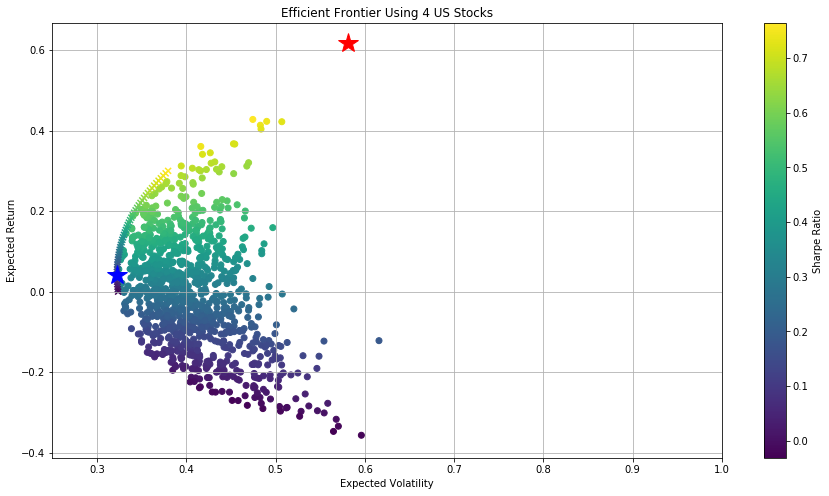

In [32]:
# Plot the efficient frontier in the same visualisation as the randomly generated portfolios
plt.figure(figsize=(15, 8))
plt.scatter(ptf_stds, ptf_rs, c=(ptf_rs - 0.01)/ptf_stds, marker='o')
plt.scatter(target_stds, target_rs, c=(target_rs - 0.01)/target_stds, marker='x')
plt.plot(ptf_stats(opts['x'])[1], ptf_stats(opts['x'])[0], 'r*', markersize=20.0)
plt.plot(ptf_stats(opt_var['x'])[1], ptf_stats(opt_var['x'])[0], 'b*', markersize=20.0)
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.xlim(0.25, 1)
plt.colorbar(label='Sharpe Ratio')
plt.title('Efficient Frontier Using 4 US Stocks')

Text(0.5, 1.0, 'Efficient Frontier Using 4 US Stocks')

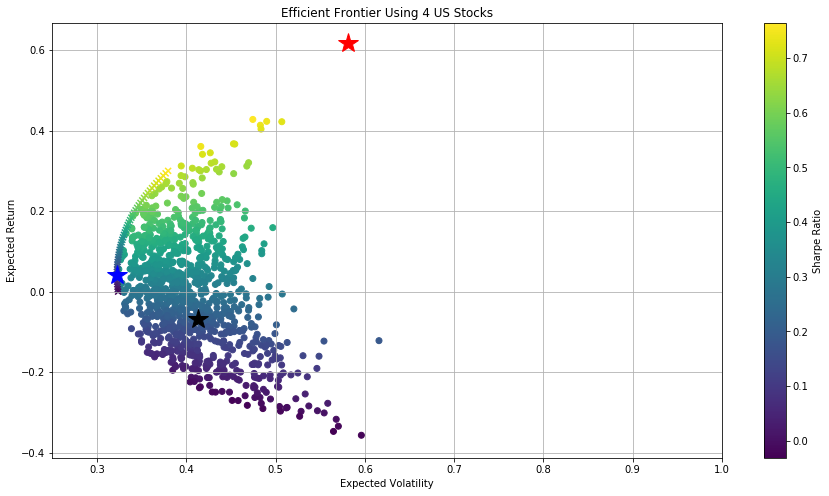

In [34]:
# Include the initially generated random weights
plt.figure(figsize=(15, 8))
plt.scatter(ptf_stds, ptf_rs, c=(ptf_rs - 0.01)/ptf_stds, marker='o')
plt.scatter(target_stds, target_rs, c=(target_rs - 0.01)/target_stds, marker='x')
plt.plot(ptf_stats(opts['x'])[1], ptf_stats(opts['x'])[0], 'r*', markersize=20.0)
plt.plot(ptf_stats(opt_var['x'])[1], ptf_stats(opt_var['x'])[0], 'b*', markersize=20.0)
plt.plot(ptf_stats(weights)[1], ptf_stats(weights)[0], 'k*', markersize=20.0)
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.xlim(0.25,1)
plt.colorbar(label='Sharpe Ratio')
plt.title('Efficient Frontier Using 4 US Stocks')

In [35]:
# Create DataFrame of the weighst assigned to each ticker
composition = {'Expected Return': annual_r.round(3), 'Maximum Sharpe': weights_opt, 'Black Star': weights.round(3)}
comp = pd.DataFrame(composition, columns = ['Expected Return', 'Maximum Sharpe', 'Black Star'], index=tickers)
comp

Expected Return  Maximum Sharpe  Black Star
TSLA            0.618             1.0       0.040
GME            -0.071             0.0       0.484
AMC            -0.482             0.0       0.073
NOK            -0.055             0.0       0.403

To get a possible explanation of why the portfolio weights are allocated the way they are I have included the expected return for each stock in the table above. For better insights we will also look at the correlation matrix.

In [36]:
# Inspect the correlation matrix
corr_matrix = log_r.corr()
corr_matrix

TSLA       GME       AMC       NOK
TSLA  1.000000  0.178724  0.181850  0.181719
GME   0.178724  1.000000  0.179142  0.128426
AMC   0.181850  0.179142  1.000000  0.232036
NOK   0.181719  0.128426  0.232036  1.000000

## Capital Market Line

Once we have the efficient portfolio we can add a riskless asset, i.e. cash to the mix. Investing in the riskless asset and the efficient portflio greatly enhances the efficient investment opportunity set for the investor and gives them a way to find an efficient capital allocation that matches their risk appetite. By adjusting the portion of the total wealth invested in teh riskless asset, the investor can (in theory) achieve any risk-return profile that lies on the straight line between the riskless asset and the efficient portfolio (and theoretically beyond that point by borrowing).

In [37]:
# Import cubic splines interpolation module
import scipy.interpolate as sci

In [38]:
# Select the index of the absolute minimum variance portfolio
min_var = np.argmin(target_stds)

# Select expected volatilities for the stocks on the efficient frontier
ex_stds = target_stds[min_var:]

# Select expected returns for the stocks on the efficient frontier
ex_rs = target_rs[min_var:]

These ndarray objects can then be used for the interpolation. B-spline interpolation takes sets of adjacent points and constructs a ploynomial passing through those points. Essentially, what the interpolation gives us is a continuous function that approximates the efficient frontier. This function can then be differentiated in order to find the slope of the line that is tangent to the efficient frontier and passes through the riskless asset.

In [39]:
# Interpolate the B-spline representation of the data points
tck = sci.splrep(ex_stds, ex_rs)

In [40]:
# Obtain coordinates to be used for plotting the B-spline interpolation of the efficient frontier
x_lower = min(ex_stds)
x_upper = max(ex_stds)
x_range = np.linspace(x_lower, x_upper, 500)
bspline = sci.splev(x_range, tck)

Text(0.5, 1.0, 'Efficient Frontier Using 4 US Stocks')

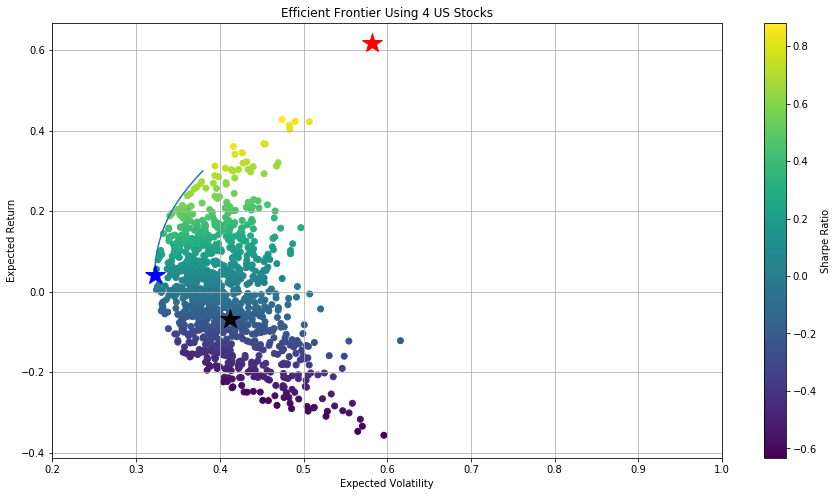

In [41]:

# Plot the B-spline interpolation of the efficient frontier
plt.figure(figsize=(15, 8))
plt.scatter(ptf_stds, ptf_rs, c=(ptf_rs - 0.01)/ptf_stds, marker='o')
plt.plot(x_range, bspline)
plt.plot(ptf_stats(opts['x'])[1], ptf_stats(opts['x'])[0], 'r*', markersize=20.0)
plt.plot(ptf_stats(opt_var['x'])[1], ptf_stats(opt_var['x'])[0], 'b*', markersize=20.0)
plt.plot(ptf_stats(weights)[1], ptf_stats(weights)[0], 'k*', markersize=20.0)
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.xlim(0.2, 1)
plt.colorbar(label='Sharpe Ratio')
plt.title('Efficient Frontier Using 4 US Stocks')

The B-spline interpolation can be used to find a cintinuously differentiable function and, more interestingly, its derivatives.

In [42]:
# Define a continuously differentiable function f(x) for the efficient frontier
def f(x):
    return sci.splev(x, tck, der=0)

# Define the first derivate function of f(x)
def df(x):
    return sci.splev(x, tck, der=1)

Assuming a risk-free rate of return of 1% and a parameter set p=(a,b,x) we can set up a system of equations for the capital market line.

In [43]:
def cml_conditions(p, rf=0.01):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

## Provided with an initial parameterisation in addition to the system of equations, 
## the optimisation function fsolve is capable of solving the system of equation.

In [44]:
# Solve for the parameters of the Capital Market Line
cml = sco.fsolve(cml_conditions, [0.01, 1.0, 0.15])

C:\Users\judah\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


In [45]:
# Create input variable for CML
cx = np.linspace(0.0, 0.3)

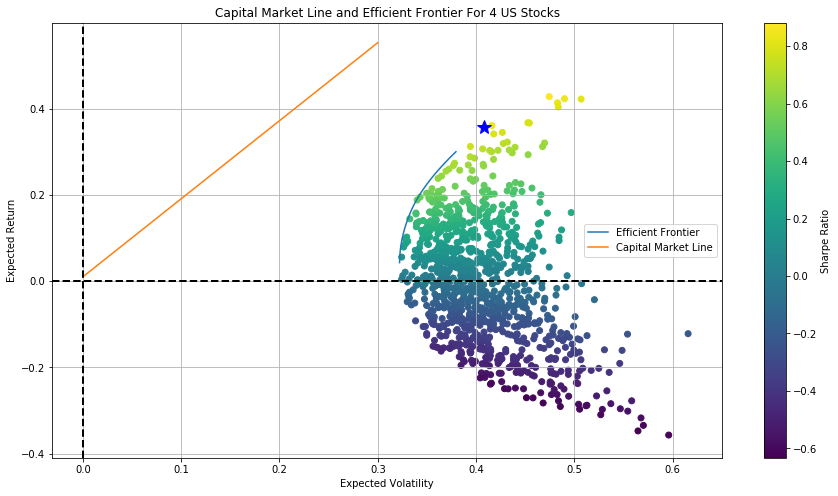

In [46]:
# Plot the resulting Capital Market Line together with the efficient frontier
plt.figure(figsize=(15, 8))
plt.scatter(ptf_stds, ptf_rs, c=(ptf_rs - 0.01)/ptf_stds, marker='o') # Random portfolios
plt.plot(x_range, bspline, label='Efficient Frontier') # Efficient Frontier
plt.plot(cx, cml[0] + cml[1] * cx, lw=1.5, label='Capital Market Line') # Capital Market Line
plt.plot(cml[2], f(cml[2]), 'b*', markersize=15.0) # Optimal portfolio where the tangent line passes through rf
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.title('Capital Market Line and Efficient Frontier For 4 US Stocks')
plt.legend(loc=7)

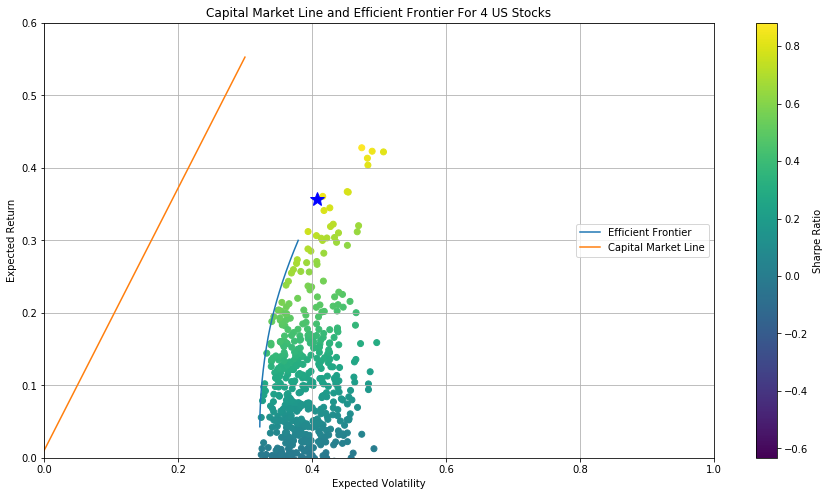

In [47]:
# Zoom in on Capital Market Line together with the efficient frontier
plt.figure(figsize=(15, 8))
plt.scatter(ptf_stds, ptf_rs, c=(ptf_rs - 0.01)/ptf_stds, marker='o') # Random portfolios
plt.plot(x_range, bspline, label='Efficient Frontier') # Efficient Frontier
plt.plot(cx, cml[0] + cml[1] * cx, lw=1.5, label='Capital Market Line') # Capital Market Line
plt.plot(cml[2], f(cml[2]), 'b*', markersize=15.0) # Optimal portfolio where the tangent line passes through rf
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.xlim(0, 1)
plt.ylim(0, 0.6)
plt.colorbar(label='Sharpe Ratio')
plt.title('Capital Market Line and Efficient Frontier For 4 US Stocks')
plt.legend(loc=7)

Including Cryptocurrency in this portfolio

In [48]:
crypto_tickers = ['BTC-USD', 'ETH-USD', 'USDT-USD', 'LTC-USD']

In [49]:
# Obtain Bitcoin price data
btc = data.DataReader('BTC-USD', data_source='yahoo', start=start, end=end)['Adj Close']

# Obtain Ethereum, Tether and Litecoin
eth = data.DataReader('ETH-USD', data_source='yahoo', start=start, end=end)['Adj Close']
tet = data.DataReader('USDT-USD', data_source='yahoo', start=start, end=end)['Adj Close']
ltc = data.DataReader('LTC-USD', data_source='yahoo', start=start, end=end)['Adj Close']

In [50]:

# Create cryptocurrency dataframe
cryptos = {'BTC': btc, 'ETH': eth, 'USDT': tet, 'LTC': ltc}
crypto_prices = pd.DataFrame(cryptos)
#crypto_prices
#cryptos

In [51]:
# Plot the time series in normalised fashion
norm = crypto_prices / crypto_prices.iloc[0] * 100
norm
#plt(norm)
#norm.plot(x = 'Date', y = 'ETH', figsize=(20, 10))
#df[df.index >= "2016-03-31"].Close.plot(figsize=(14, 7))
#norm[norm.index >= "2016-03-31"].ETH.plot(figsize=(14, 7))
#plt.title('Cryptocurrencies time series 2016 - 2021', fontsize=20.0)

BTC           ETH        USDT          LTC
Date                                                          
2016-03-30   100.000000    100.000000  100.000000   100.000000
2016-03-31   100.295393    102.280882  100.000000    99.474370
2016-04-01   100.994407    101.713511  100.000000   100.154738
2016-04-02   101.001847    101.883640  100.000000   100.172240
2016-04-03   101.131430     97.841017  100.000000    99.801049
...                 ...           ...         ...          ...
2021-01-05  8156.962767   9646.215125  100.220203  4869.246568
2021-01-06  8836.525160  10585.453805  100.152802  5189.231998
2021-01-07  9447.636857  10748.262755  100.039995  5207.623667
2021-01-08  9789.961580  10735.275890  100.004494  5320.115112
2021-01-09  9659.646076  11234.071251  100.294697  5449.189885

[1742 rows x 4 columns]

## Try to see if you can make plots of normalized returns here

In [52]:
# Calculate the log returns
crypto_log_r = np.log(crypto_prices / crypto_prices.shift(1))

# Annualising the returns
crypto_annual_r = crypto_log_r.mean() * 252
crypto_annual_r


BTC     0.661560
ETH     0.683416
USDT    0.000426
LTC     0.578696
dtype: float64

In [53]:
#Combining the  stocks with a crypto
# Compare the length of the stock price data to that of the cryptocurrencies
len(prices), len(crypto_prices)

(1204, 1742)

In [54]:
# Left join the two DataFrames, thereby dropping the redundant cryptocurrency data
combined_prices = prices.merge(crypto_prices, on ='Date', how='left')
combined_prices.dropna(inplace=True)

In [55]:
# Compute log returns once again
combined_log_r = np.log(combined_prices / combined_prices.shift(1))

In [56]:
# Have a look at the correlation matrix of stock prices and cryptocurrencies
combined_corr_matrix = combined_log_r.corr()
combined_corr_matrix

TSLA       GME       AMC       NOK       BTC       ETH      USDT  \
TSLA  1.000000  0.184735  0.183457  0.182671  0.054674  0.046900  0.018925   
GME   0.184735  1.000000  0.173423  0.133380  0.025611  0.015111  0.001512   
AMC   0.183457  0.173423  1.000000  0.245980  0.045067  0.070338 -0.018068   
NOK   0.182671  0.133380  0.245980  1.000000  0.071167  0.093323 -0.064400   
BTC   0.054674  0.025611  0.045067  0.071167  1.000000  0.623614 -0.044386   
ETH   0.046900  0.015111  0.070338  0.093323  0.623614  1.000000 -0.016978   
USDT  0.018925  0.001512 -0.018068 -0.064400 -0.044386 -0.016978  1.000000   
LTC   0.062567  0.004682  0.060533  0.053987  0.665068  0.596078 -0.054834   

           LTC  
TSLA  0.062567  
GME   0.004682  
AMC   0.060533  
NOK   0.053987  
BTC   0.665068  
ETH   0.596078  
USDT -0.054834  
LTC   1.000000

Looking at the last four columns in the above matrix we can see that all four cryptocurrencies were mostly uncorrelated to any of the stocks. This could be an indication that including at least oe of the cryptocurrencies in the portfolio could be beneficial in a mean-variance sense.

In [57]:
# Annualise the combined covariance matrix
combined_cov_matrix = combined_log_r.cov() * 252

In the following section I will follow the same approach as with the stock price data. First, I will generate 5000 random portfolios, then I will compute the efficient frontier, which I will combine to the efficient frontier obtained with only stocks, and finally I will compute the new Capital Market Line.

In [58]:
# Generate the return and volatility of 1000 random portfolios
combined_ptf_rs, combined_ptf_stds = generate_ptfs(combined_log_r, 1000)

# Obtain the number of assets used in this analysis
num_assets = len(combined_prices.columns)
num_assets

8

In [59]:
# Redefine the portfolio statistics function
def combined_ptf_stats(weights):
    weights = np.array(weights)
    ptf_r = np.sum(combined_log_r.mean() * weights) * 252
    ptf_std = np.sqrt(np.dot(weights.T, np.dot(combined_log_r.cov() * 252, weights)))
    return np.array([ptf_r, ptf_std, (ptf_r -0.01) / ptf_std])

In [60]:
# Redefine the maximize Sharpe ratio function
def max_sharpe(weights):
    return -combined_ptf_stats(weights)[2]

In [61]:
# Write the constraint that the weights have to add up to 1
combined_cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bound the weights (parameter inputs) to be within 0 and 1
combined_bnds = tuple((0, 1) for x in range(num_assets))

In [62]:
# Starting parameter (weights) list as equal distribution
combined_starting_ws = num_assets * [1. / num_assets,]

In [63]:
# Call the minimisation function
combined_opts = sco.minimize(max_sharpe, combined_starting_ws, method='SLSQP', bounds=combined_bnds, constraints=combined_cons)

In [64]:

# Obtain the optimal weights
combined_weights_opt = combined_opts['x'].round(3)
combined_weights_opt

array([0.511, 0.   , 0.   , 0.   , 0.463, 0.026, 0.   , 0.   ])

In [65]:
# Plug optimal weights into the statistics function
combined_ptf_stats(combined_weights_opt)

array([0.78763015, 0.4858965 , 1.60040288])

In [66]:
# Add one weights of zero to the stocks-only allocation
add_weights_opt = np.append(weights_opt, [0,0,0,0])

In [67]:
# Calculate combined annualised returns
combined_annual_r = combined_log_r.mean() * 252

# Create new composition DataFrame
new_composition = {'Expected Return': combined_annual_r.round(3), 'Max. Sharpe Stocks Only': add_weights_opt, 
                   'Max. Sharpe Stocks And Cryptos': combined_weights_opt.round(3)}
new_comp = pd.DataFrame(new_composition, columns=['Expected Return', 'Max. Sharpe Stocks Only', 
                                                  'Max. Sharpe Stocks And Cryptos'], index=combined_prices.columns)
new_comp

Expected Return  Max. Sharpe Stocks Only  Max. Sharpe Stocks And Cryptos
TSLA            0.620                      1.0                           0.511
GME            -0.071                      0.0                           0.000
AMC            -0.484                      0.0                           0.000
NOK            -0.055                      0.0                           0.000
BTC             0.962                      0.0                           0.463
ETH             0.977                      0.0                           0.026
USDT            0.000                      0.0                           0.000
LTC             0.836                      0.0                           0.000

In [68]:
# Redefine the function that minimises portfolio variance
def combined_min_var(weights):
    return combined_ptf_stats(weights)[1]**2

In [69]:
# Call the optimisation fcuntion
combined_opt_var = sco.minimize(combined_min_var, combined_starting_ws, method='SLSQP', bounds=combined_bnds, constraints=combined_cons)

In [70]:
# Redefine the function that returns the volatility of a portfolio given a vector of weights
def combined_min_port(weights):
    return combined_ptf_stats(weights)[1]

In [71]:
# Generate assigned weights
combined_weights = np.random.random(num_assets)

# Constrain these weights to add up to 1
combined_weights /= np.sum(combined_weights)

In [77]:

# Redefine the function to get the target returns and volatilities given a range of returns
def combined_efficient_frontier(start_r, end_r, steps):
    target_rs = np.linspace(start_r, end_r, steps)
    target_stds = []
    for r in target_rs:
        cons2 = ({'type': 'eq', 'fun': lambda x: combined_ptf_stats(x)[0] - r},
                {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
        bnds2 = tuple((0, 1) for x in combined_weights)
        res = sco.minimize(combined_min_port, combined_starting_ws, method='SLSQP', bounds = bnds2, constraints=cons2)
        target_stds.append(res['fun'])
    target_stds = np.array(target_stds)
    return target_rs, target_stds

In [78]:

# Obtain the target returns and volatilities based on 50 target returns for the combined portfolio
combined_target_rs, combined_target_stds = combined_efficient_frontier(0.0, 1.0, 100)

In [79]:
# Select the index of the absolute minimum variance portfolio
combined_min_var = np.argmin(combined_target_stds)

# Select expected volatilities for the stocks on the efficient frontier
combined_ex_stds = combined_target_stds[combined_min_var:]

# Select expected returns for the stocks on the efficient frontier
combined_ex_rs = combined_target_rs[combined_min_var:]

In [80]:
# Interpolate the B-spline representation of the data points for the combined portflio
combined_tck = sci.splrep(combined_ex_stds, combined_ex_rs)

ValueError: Error on input data

In [76]:

# Obtain coordinates to be used for plotting the B-spline interpolation of the efficient frontier of the combined
# portfolio
combined_x_lower = min(combined_ex_stds)
combined_x_upper = max(combined_ex_stds)
combined_x_range = np.linspace(combined_x_lower, combined_x_upper, 500)
combined_bspline = sci.splev(combined_x_range, combined_tck)

NameError: name 'combined_tck' is not defined

NameError: name 'combined_bspline' is not defined

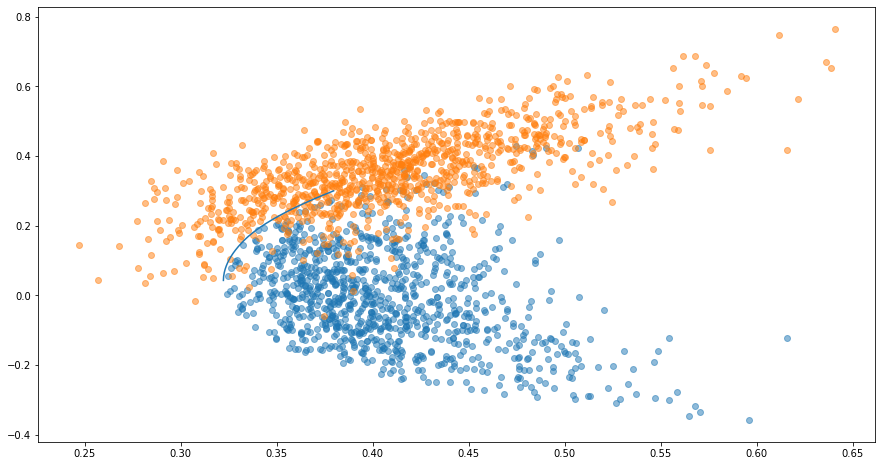

In [81]:
# Plot the B-spline interpolation of the efficient frontier
plt.figure(figsize=(15, 8))
plt.scatter(ptf_stds, ptf_rs, marker='o', alpha=0.5) # Random portfolios with stocks only
plt.scatter(combined_ptf_stds, combined_ptf_rs, marker='o', alpha=0.5) # Random 
# portfolios with stocks and cryptos
plt.plot(x_range, bspline, label='Stocks only') # Efficient frontier with only stocks
plt.plot(combined_x_range, combined_bspline, label='Stocks and cryptocurrencies') # Efficient frontier with stocks and
# cryptos
plt.plot(ptf_stats(opts['x'])[1], ptf_stats(opts['x'])[0], 'r*', markersize=20.0) # Maximum Sharpe ratio portflio
# with stocks only
plt.plot(combined_ptf_stats(combined_opts['x'])[1], combined_ptf_stats(combined_opts['x'])[0], 'r*', markersize=20.0)
# Maximum Sharpe ratio portfolio with stocks and cryptos
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.title('Efficient Frontiers of Stocks-Only vs. Stocks and Cryptocurrencies')

Now let's compute the Capital Market Line for the portflio including both stocks and cryptocurrencies and then visualise how the two compare.

In [82]:
# Redefine the continuously differentiable function f(x) for the efficient frontier
def combined_f(x):
    return sci.splev(x, combined_tck, der=0)

# Redefine the first derivate function of f(x)
def combined_df(x):
    return sci.splev(x, combined_tck, der=1)

In [83]:
# Redefine the Capital Market Line conditions
def combined_cml_conditions(p, rf=0.01):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - combined_f(p[2])
    eq3 = p[1] - combined_df(p[2])
    return eq1, eq2, eq3

In [84]:
# Solve for the parameters of the Capital Market Line
combined_cml = sco.fsolve(combined_cml_conditions, [0.01, 0.5, 0.15])

NameError: name 'combined_tck' is not defined

In [92]:
# Create input variable for CML
combined_cx = np.linspace(0.0, 1)

I will first plot the two Capital Market Lines including the corresponding efficient frontiers in the "zommed-out" view to see the origin of both lines, i.e. the risk-free rate, and then the "zommed-in" version closer to the clusters of random portflios to magnify the differences.

Text(0.5, 1.0, 'Efficient Frontier and Capital Market Line of Stocks-Only vs. Stocks and Cryptocurrencies')

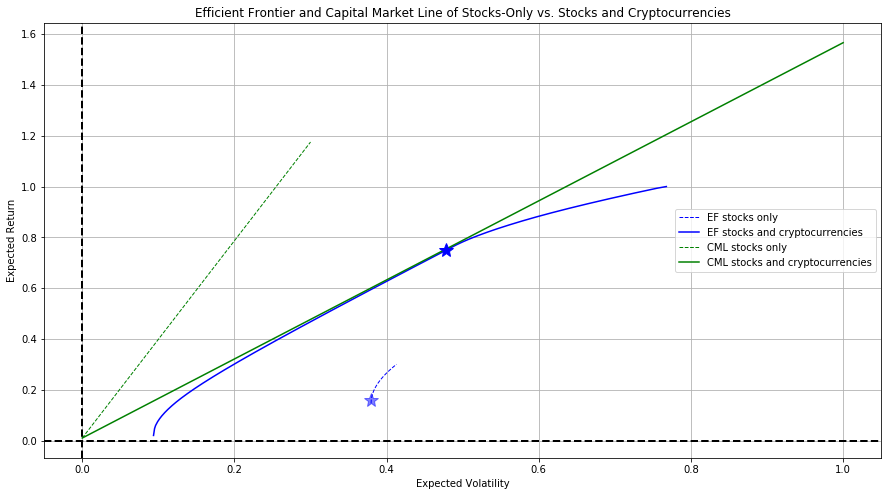

In [93]:
# Plot the "zoomed-out" view
plt.figure(figsize=(15, 8))
plt.plot(x_range, bspline, ls='--', label='EF stocks only', color='b', lw=1) # Efficient frontier with only stocks
plt.plot(combined_x_range, combined_bspline, label='EF stocks and cryptocurrencies', color='b') # Efficient frontier with stocks and
# cryptos
plt.plot(cx, cml[0] + cml[1] * cx, ls='--', lw=1, label='CML stocks only', color='g') # Capital Market Line stock-only portflio
plt.plot(combined_cx, combined_cml[0] + combined_cml[1] * combined_cx, lw=1.5, label='CML stocks and cryptocurrencies',
        color='g') 
# Capital Market Line combined portflio
plt.plot(cml[2], f(cml[2]), 'b*', markersize=15.0, alpha=0.5) # Optimal portfolio where the tangent line passes through rf
# stock-only portflio
plt.plot(combined_cml[2], combined_f(combined_cml[2]), 'b*', markersize=15.0) # Optimal portfolio where the tangent 
# line passes through rf combined portflio
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.legend()
plt.title('Efficient Frontier and Capital Market Line of Stocks-Only vs. Stocks and Cryptocurrencies')